[@LorenaABarba](https://twitter.com/LorenaABarba)

[@ggruszczynski](https://github.com/ggruszczynski)

12 steps to Navier–Stokes
======
***

This Jupyter notebook continues the presentation of the **12 steps to Navier–Stokes**, the practical module taught in the interactive CFD class of [Prof. Lorena Barba](http://lorenabarba.com). You should have completed [Step 1](./01_Step_1.ipynb) before continuing, having written your own Python script or notebook and having experimented with varying the parameters of the discretization and observing what happens.


Step 2: Nonlinear Convection
-----
***

Now we're going to implement nonlinear convection using the same methods as in step 1.  The 1D convection equation is:

$$\frac{\partial u}{\partial t} + u \frac{\partial u}{\partial x} = 0$$

Instead of a constant factor $c$ multiplying the second term, now we have the solution $u$ multiplying it. Thus, the second term of the equation is now *nonlinear*. We're going to use the same discretization as in Step 1 — forward difference in time and backward difference in space. Here is the discretized equation.

$$\frac{u_i^{n+1}-u_i^n}{\Delta t} + u_i^n \frac{u_i^n-u_{i-1}^n}{\Delta x} = 0$$

Solving for the only unknown term, $u_i^{n+1}$, yields:

$$u_i^{n+1} = u_i^n - u_i^n \frac{\Delta t}{\Delta x} (u_i^n - u_{i-1}^n)$$

As before, the Python code starts by loading the necessary libraries. Then, we declare some variables that determine the discretization in space and time (you should experiment by changing these parameters to see what happens). Then, we create the initial condition $u_0$ by initializing the array for the solution using $u = 2\ @\ 0.5 \leq x \leq 1$  and $u = 1$ everywhere else in $(0,2)$ (i.e., a hat function).

In [1]:
import numpy                 # we're importing numpy 
from matplotlib import pyplot    # and our 2D plotting library
%matplotlib inline


nx = 41
domain_length = 8
dx = domain_length / (nx - 1)
nt = 1     #nt is the number of timesteps we want to calculate
dt = .025  #dt is the amount of time each timestep covers (delta t)


The code snippet below is *unfinished*. We have copied over the line from [Step 1](./01_Step_1.ipynb) that executes the time-stepping update. Can you edit this code to execute the nonlinear convection instead?

Try different initial conditions

* the 'hat'

* a smooth, tanh function


array([-4. , -3.8, -3.6, -3.4, -3.2, -3. , -2.8, -2.6, -2.4, -2.2, -2. ,
       -1.8, -1.6, -1.4, -1.2, -1. , -0.8, -0.6, -0.4, -0.2,  0. ,  0.2,
        0.4,  0.6,  0.8,  1. ,  1.2,  1.4,  1.6,  1.8,  2. ,  2.2,  2.4,
        2.6,  2.8,  3. ,  3.2,  3.4,  3.6,  3.8,  4. ])

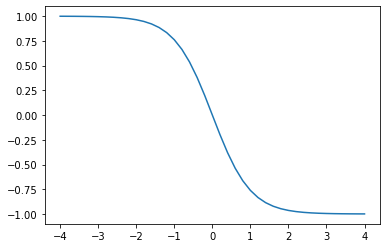

In [2]:

# Try different Initial Conditions
# xspace = numpy.linspace(0, domain_length, nx)
xspace=numpy.linspace(-domain_length/2, domain_length/2, num=nx, endpoint=True)
u_IC = numpy.ones(nx)      #as before, we initialize u with every value equal to 1.
u_IC[int(.5 / dx) : int(1 / dx + 1)] = 2 #then set u = 2 between 0.5 and 1 as per our I.C.s


# u_IC = -numpy.tanh(xspace) +1 
# u_IC = numpy.tanh(xspace) +1
u_IC = -numpy.tanh(xspace) 
pyplot.plot(xspace, u_IC)
xspace

In [ ]:

nt += 1 

u = u_IC.copy() #initialize our placeholder array un, to hold the time-stepped solution
for n in range(nt):  #iterate through time
    un = u.copy() ##copy the existing values of u into un
    for i in range(1, nx):  ##now we'll iterate through the u array
        
     ###This is the line from Step 1, copied exactly.  Edit it for our new equation.
     ###then uncomment it and run the cell to evaluate Step 2   
      
        #  u[i] = un[i] - c * dt / dx * (un[i] - un[i-1]) 



#Plot the results
pyplot.plot(xspace, u)

# Questions:

* how does the variable advection coefficient influence behaviour of the equation?
* why does the IC=tanh behave differently than IC=-tanh
* In case of an implicit approach... do you need to inverse the $\mathbb{A}$ matrix (see step 1) in each time step? 
* How one could speed up the calculation of inverse of $\mathbb{A}$? 

What do you observe about the evolution of the hat function under the nonlinear convection equation? What happens when you change the numerical parameters and run again?

## Learn More

For a careful walk-through of the discretization of the convection equation with finite differences (and all steps from 1 to 4), watch **Video Lesson 4** by Prof. Barba on YouTube.

In [ ]:
from IPython.display import YouTubeVideo
YouTubeVideo('y2WaK7_iMRI')

In [ ]:
from IPython.core.display import HTML
def css_styling():
    styles = open("../styles/custom.css", "r").read()
    return HTML(styles)
css_styling()

> (The cell above executes the style for this notebook.)